## Python statistics essential training - 06_bayesian

Standard imports

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt


import pymc3 as pm     # Baysian inferences package

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Classic baysian example: I have a coin and I'm suspicious that it's not fair. I want to test the fairness of the coin. That is throwing repeatedly may result in 40%-80% heads (rathar than 50%)

In [2]:
n = 100          # Throw a die 100 times
k = 61           # number of heads

# Now I create the pymc model 
with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)          # Actual fraction of head happening (between 0.4 and 0.8)
    
    y = pm.Binomial('y',n=n, p=p, observed=k)
    
    trace = pm.sample(10000)               # ask pymc to generate a large set of population parameters 
                                           # that are approximately distributed according to the posterior

c:\Users\Azadeh\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 50 seconds.


In [3]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Azadeh\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.519,0.699,0.0,0.0,16866.0,24112.0,1.0


The mean = 60% (the most probable value for the biasness of the coin) 

Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Azadeh\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

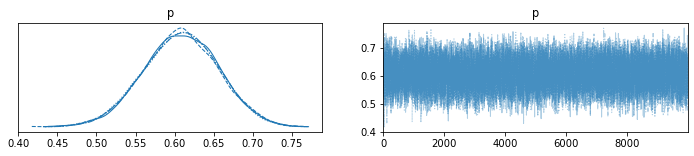

In [4]:
pm.plot_trace(trace)

The plot on te right shows all the values taken on by parameter p.

In [5]:
gdata = pd.read_csv('gapminder.csv').query('year == 1985')
gdata.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956


In [6]:
gdata.sort_values('age5_surviving',inplace=True)
gdata.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
9768,Niger,1985,Africa,6838170.0,44.63,66.71,7.78,997.0,2.729637
8391,Mali,1985,Africa,7831891.0,46.68,71.50,7.09,1001.0,2.740589
11712,Sierra Leone,1985,Africa,3466044.0,53.14,72.72,6.89,1415.0,3.874059
5394,Guinea,1985,Africa,5078689.0,47.33,73.69,6.64,1085.0,2.970568
9201,Mozambique,1985,Africa,13102982.0,50.02,74.59,6.40,379.0,1.037645


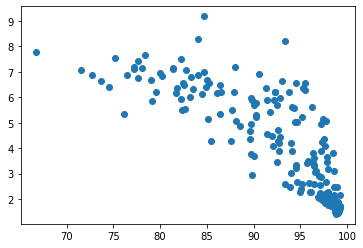

In [7]:
plt.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [8]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)     # visually I can tell it's around 10
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sd = 1,
                       observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

c:\Users\Azadeh\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Azadeh\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]


In [ ]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,10.194361,0.280698,0.002852,9.646776,10.747732,9035.559901,1.000022
slope,-0.219233,0.010205,0.000104,-0.239636,-0.199625,9100.037641,1.000025


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c212611d0>,
      dtype=object)

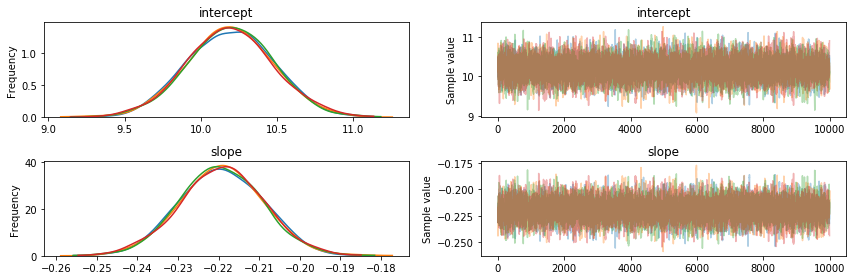

In [ ]:
pm.traceplot(trace)

In [ ]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

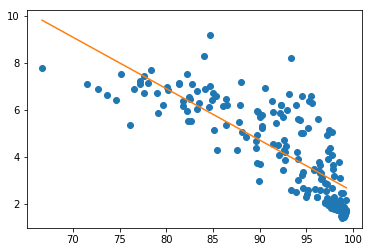

In [ ]:
plt.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
plt.plot(gdata['age5_surviving'],babies,'C1')

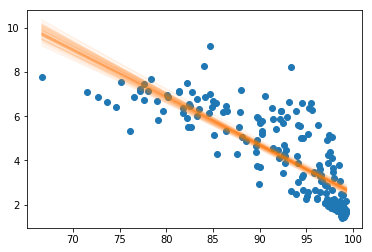

In [ ]:
plt.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    plt.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)